# Results from the silver-paste experiments

Silver paste was dissolved in mineral oil at different concentrations. After mixing the oil-paste mixture was drawn into a syringe and injected into the micro-channel. Experiments were conducted in Mar/Apr 2023.

In [1]:
import matplotlib.pyplot as plt
import os
from typing import Tuple

### Path where figures are saved to - change as needed

In [2]:
glob_figpath = '/home/mkrause/data/silver_paste'

## Resistance values from Excel sheet "Ag_filling.xlsx"

In [3]:
xl_429_ul_per_g = [175.525, 43.5419, 37.1941, 112.096]
xl_321_ul_per_g = [89.8254, 94.6582, 93.5816, 108.119, 139.893, 175.02]
l_321_ul_per_g = [138.094, 192.229, 191.67, 158.32]

## Define x- and y-labels

In [5]:
xlabel = 'Measured electrical resistance ($M\Omega$)'
ylabel = 'Frequency'

## Define a plot function

In [6]:
def plot_hist(*data: Tuple[Tuple], title: str, xlabel: str, ylabel: str, fig_name: str, n_bins: int=6) -> None:
    """Plots a histogram of resistance measurements of one or more data sets"""
    fig, ax = plt.subplots()
    # data is expected to be a tuple of 2-tuples. The first element in the 2-tuple is the name of list that 
    # holds the resistance values, and the second element is the label string that displays in the legend of the
    # plot.
    for datum in data:
        ax.hist(datum[0], bins=n_bins, label=datum[1])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    figpath = os.path.join(glob_figpath, fig_name)
    fig.savefig(figpath)

## Compare resistance distribution of two dilutions in XL-sized channels

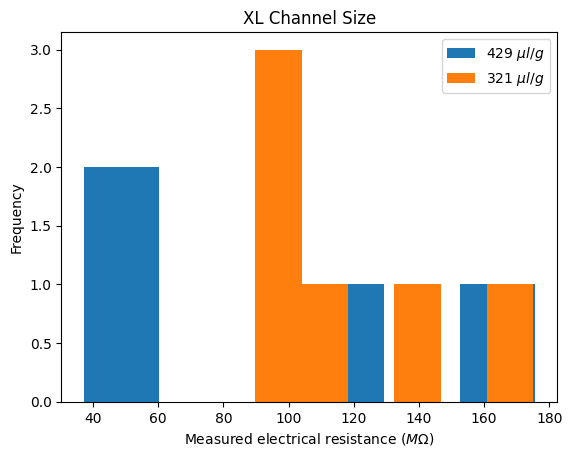

In [7]:
title = 'XL Channel Size'
fig_name = 'xl_size_channel.png'
data = (
    (xl_429_ul_per_g, '429 $\mu l/g$'), 
    (xl_321_ul_per_g, '321 $\mu l/g$')
)
plot_hist(*data, title=title, xlabel=xlabel, ylabel=ylabel, fig_name=fig_name)

## Compare restistance distribution of two channel size and same dilution

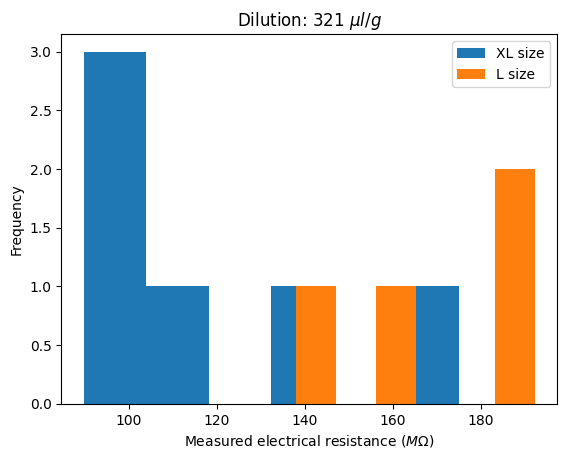

In [8]:
title = 'Dilution: 321 $\mu l/g$'
fig_name = 'xl_and_l_size_channel_same_dilution.png'
data = (
    (xl_321_ul_per_g, 'XL size'), 
    (l_321_ul_per_g, 'L size')
)
plot_hist(*data, title=title, xlabel=xlabel, ylabel=ylabel, fig_name=fig_name)

## Results from the PCB measurements

### Lists of measured electr. resistances. Values are in K$\Omega$, and are converted to M$\Omega$ to make it easy to compare to the values we get from the resistance measurements of the silver paste in the channel

In [11]:
pcb_321_ul_per_g = [x / 1000 for x in [10841.4, 10841, 10841.1]]
pcb_429_ul_per_g = [x / 1000 for x in [17256.3, 17127.4, 20288.1, 17379.2]]

In [74]:
def plot_box(data, title=None, xlabel=None, ylabel=None, yticklabel=None, figname=None, xlim=None) -> None:
    """Create horizontal boxplot of data"""
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0.4, right=0.8, top=0.9, bottom=0.2)
    ax.boxplot(x=data, patch_artist = True, vert = 0, widths=(0.5, 0.5))
    ax.set_title(title)
    ax.set_yticklabels(yticklabel)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        plt.xlim(xlim)
    if figname:
        figpath = os.path.join(glob_figpath, figname)
        fig.savefig(figpath)

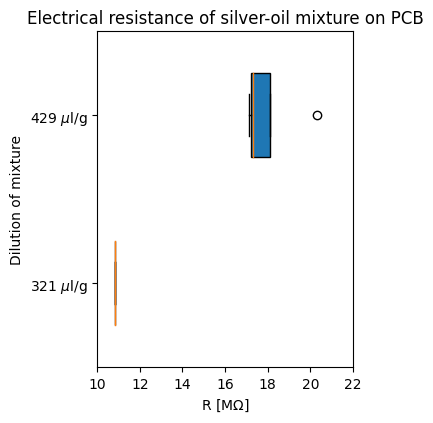

In [75]:
title = 'Electrical resistance of silver-oil mixture on PCB'
xlabel = 'R [M$\Omega$]'
ylabel = 'Dilution of mixture'
yticklabel = ['321 $\mu$l/g', '429 $\mu$l/g']
figname = 'resistance_pcb.png'
xlim = [10, 22]
plot_box(data=[pcb_321_ul_per_g, pcb_429_ul_per_g], title=title, xlabel=xlabel, ylabel=ylabel, yticklabel=yticklabel, figname=figname, xlim=xlim)